In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from pprint import pprint

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Eli Lilly/data/dataset/train.csv")

In [30]:
df = pd.read_csv("D:/Sashank/Music Data/train.csv")

In [31]:
# Klib to for data cleaning and EDA
import klib

GridSpec(6, 6)

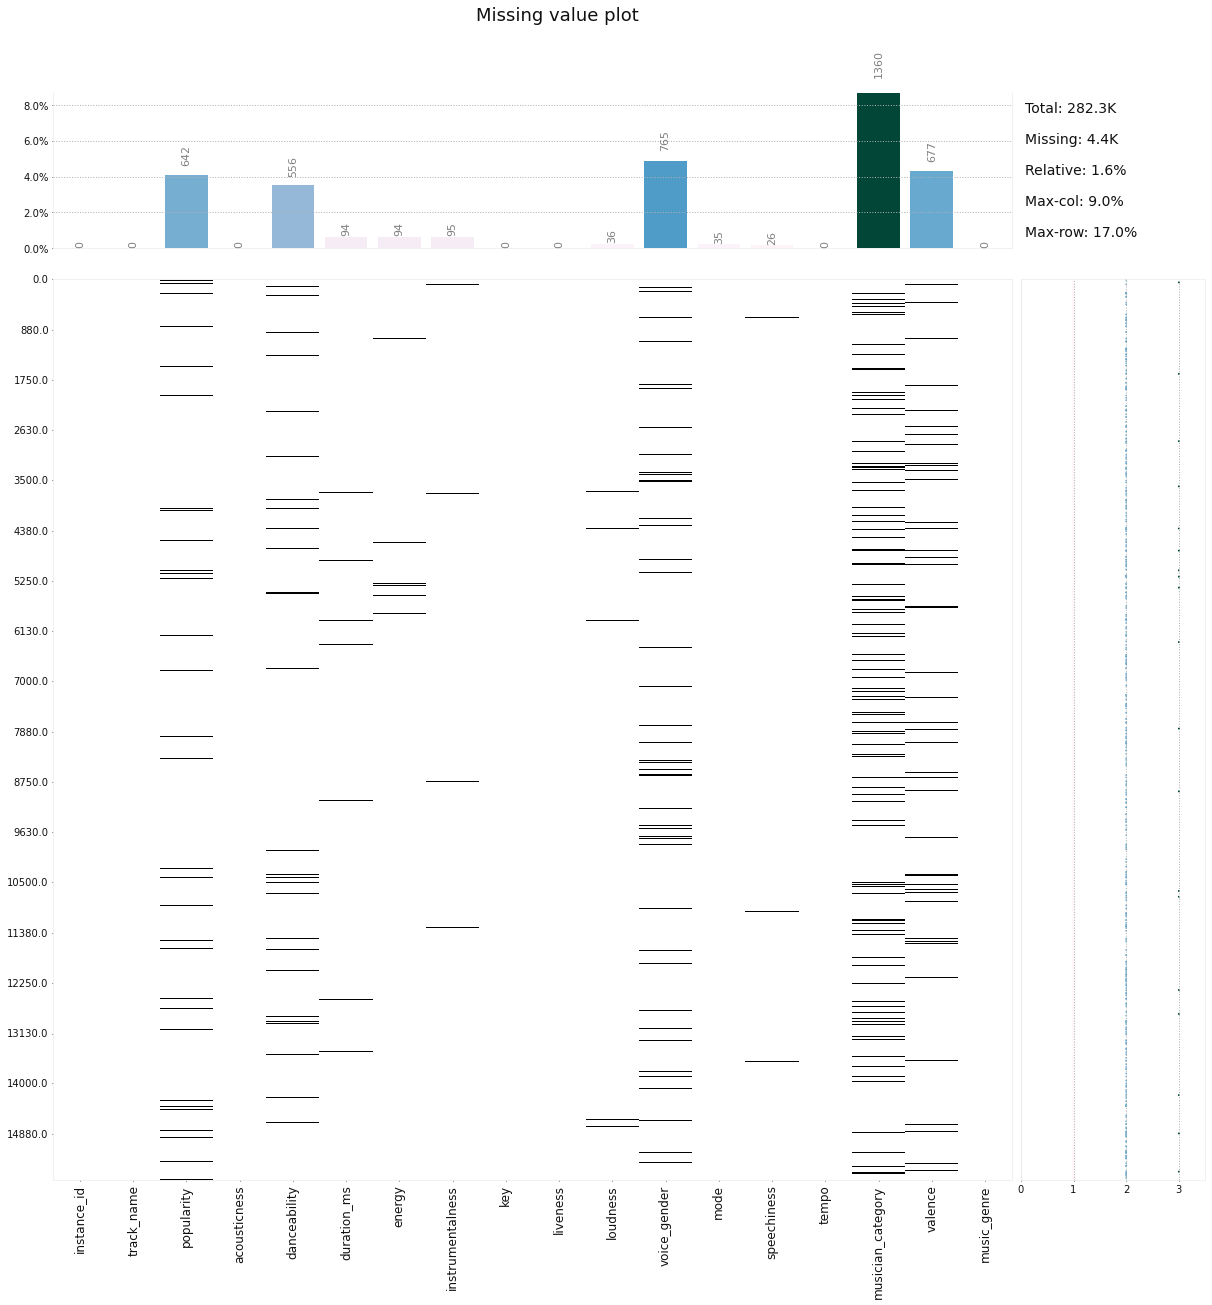

In [32]:
klib.missingval_plot(df)

In [33]:
# # Data Cleaning 
# data_cleaning() drops empty and single valued columns as well as empty and duplocate rows 

In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [35]:
#Dropping NaN Rows from data set 
df1 = df.copy(deep=True)

In [36]:
df.isna().any()

instance_id          False
track_name           False
popularity            True
acousticness         False
danceability          True
duration_ms           True
energy                True
instrumentalness      True
key                  False
liveness             False
loudness              True
voice_gender          True
mode                  True
speechiness           True
tempo                False
musician_category     True
valence               True
music_genre          False
dtype: bool

In [37]:
df1.dropna(axis=0,how="any",inplace=True)


In [38]:
df1.replace("?",np.nan, inplace=True)

In [39]:
df1 = df1.drop(columns=['instance_id','track_name'])

GridSpec(6, 6)

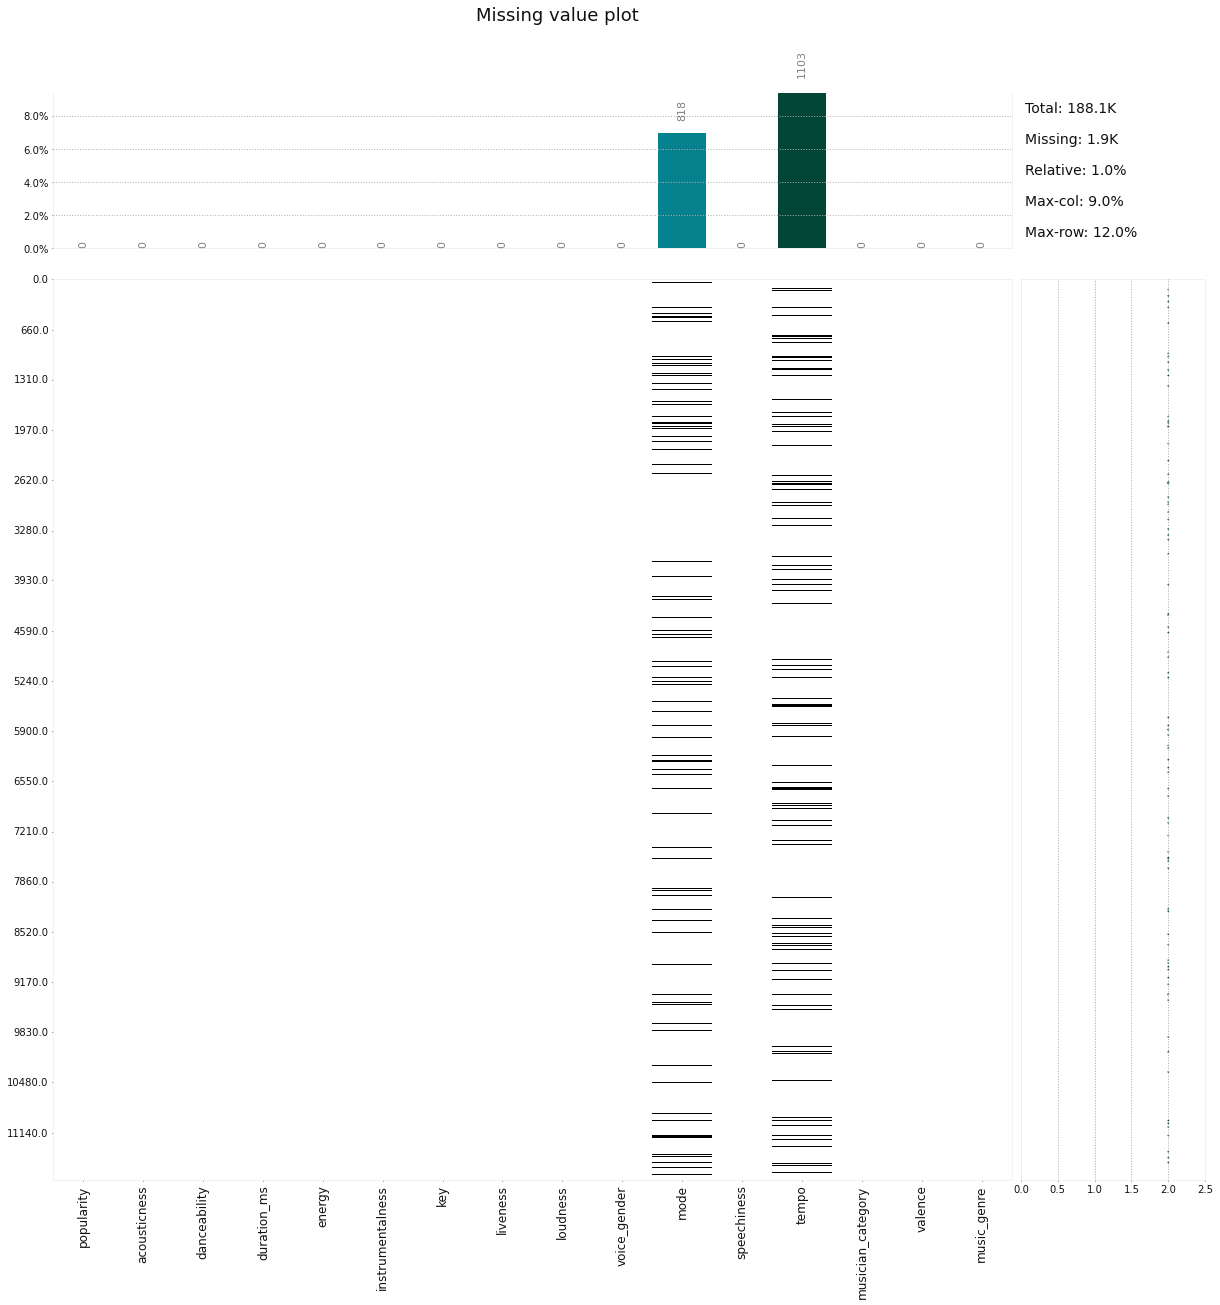

In [40]:
klib.missingval_plot(df1)

In [41]:
df1.dropna(axis=0, how="any", inplace=True)

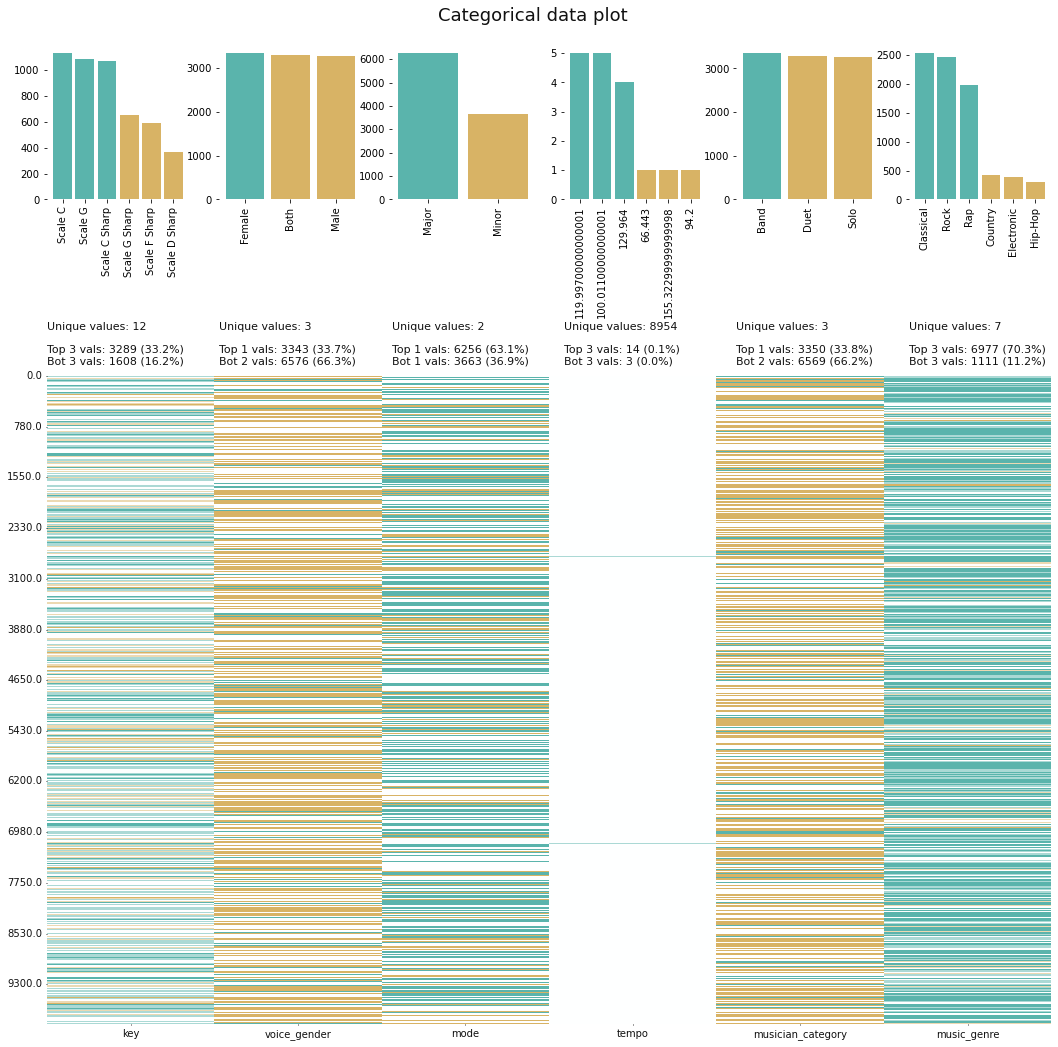

In [43]:
cat_plot = klib.describe.cat_plot(df1)
plot.figure.savefig("cat_plot.pdf")

In [44]:
df1.isna().any()

popularity           False
acousticness         False
danceability         False
duration_ms          False
energy               False
instrumentalness     False
key                  False
liveness             False
loudness             False
voice_gender         False
mode                 False
speechiness          False
tempo                False
musician_category    False
valence              False
music_genre          False
dtype: bool

In [45]:
klib.describe.corr_mat(df1)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.00,-0.56,0.44,-0.15,0.30,-0.50,-0.01,0.52,0.20,0.30
acousticness,-0.56,1.00,-0.54,0.13,-0.48,0.53,-0.11,-0.73,-0.24,-0.40
danceability,0.44,-0.54,1.00,-0.23,0.28,-0.42,0.01,0.53,0.34,0.55
duration_ms,-0.15,0.13,-0.23,1.00,-0.08,0.18,-0.01,-0.14,-0.10,-0.19
energy,0.30,-0.48,0.28,-0.08,1.00,-0.31,0.10,0.46,0.11,0.30
instrumentalness,-0.50,0.53,-0.42,0.18,-0.31,1.00,-0.15,-0.56,-0.25,-0.34
liveness,-0.01,-0.11,0.01,-0.01,0.10,-0.15,1.00,0.12,0.13,0.08
loudness,0.52,-0.73,0.53,-0.14,0.46,-0.56,0.12,1.00,0.21,0.43
speechiness,0.20,-0.24,0.34,-0.10,0.11,-0.25,0.13,0.21,1.00,0.13
valence,0.30,-0.40,0.55,-0.19,0.30,-0.34,0.08,0.43,0.13,1.00


In [46]:
test = klib.clean.convert_datatypes(df1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9919 entries, 2 to 15680
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   popularity         9919 non-null   Float32 
 1   acousticness       9919 non-null   Float32 
 2   danceability       9919 non-null   Float32 
 3   duration_ms        9919 non-null   Float32 
 4   energy             9919 non-null   Float32 
 5   instrumentalness   9919 non-null   Float32 
 6   key                9919 non-null   category
 7   liveness           9919 non-null   Float32 
 8   loudness           9919 non-null   Float32 
 9   voice_gender       9919 non-null   category
 10  mode               9919 non-null   category
 11  speechiness        9919 non-null   Float32 
 12  tempo              9919 non-null   string  
 13  musician_category  9919 non-null   category
 14  valence            9919 non-null   Float32 
 15  music_genre        9919 non-null   category
dtypes: Fl

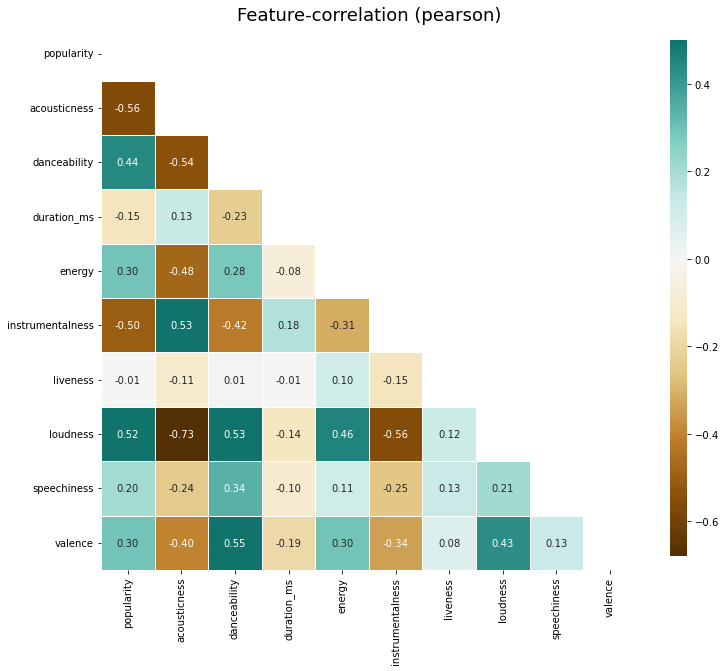

In [106]:
plot = klib.corr_plot(df1)

In [47]:
plot.figure.savefig('corr_plot.pdf')

In [48]:
print(df.shape,df1.shape)

(15681, 18) (9919, 16)


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9919 entries, 2 to 15680
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         9919 non-null   float64
 1   acousticness       9919 non-null   float64
 2   danceability       9919 non-null   float64
 3   duration_ms        9919 non-null   float64
 4   energy             9919 non-null   float64
 5   instrumentalness   9919 non-null   float64
 6   key                9919 non-null   object 
 7   liveness           9919 non-null   float64
 8   loudness           9919 non-null   float64
 9   voice_gender       9919 non-null   object 
 10  mode               9919 non-null   object 
 11  speechiness        9919 non-null   float64
 12  tempo              9919 non-null   object 
 13  musician_category  9919 non-null   object 
 14  valence            9919 non-null   float64
 15  music_genre        9919 non-null   object 
dtypes: float64(10), object(

In [50]:
s = df1["tempo"] 
s = pd.to_numeric(s)

In [51]:
df1["tempo"] = s

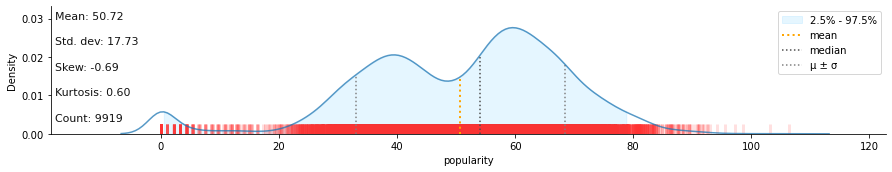

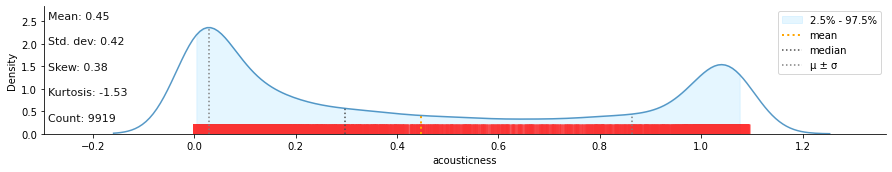

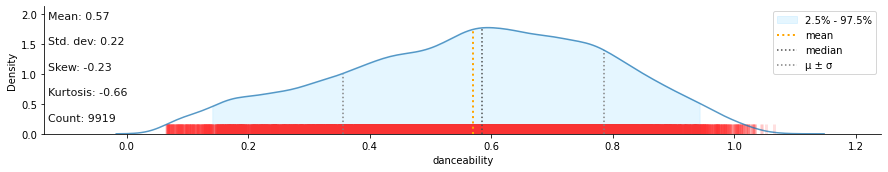

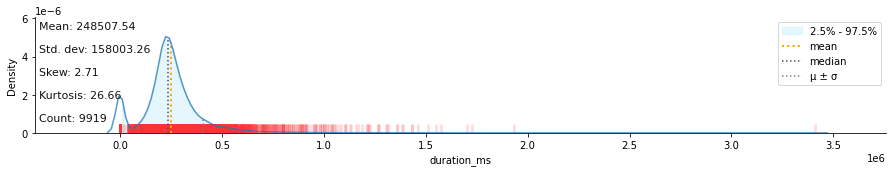

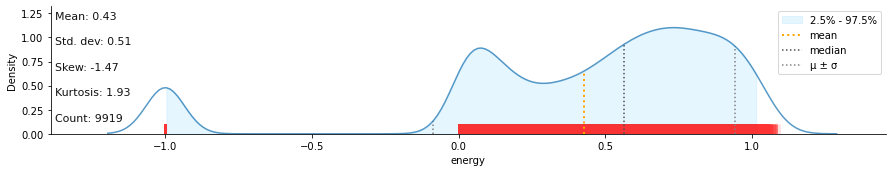

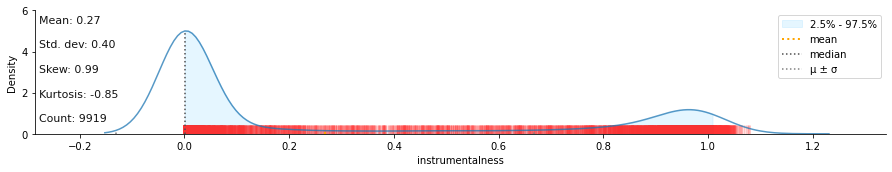

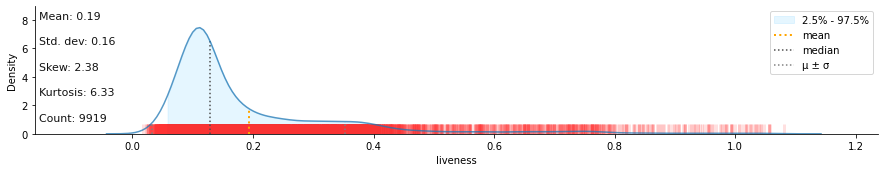

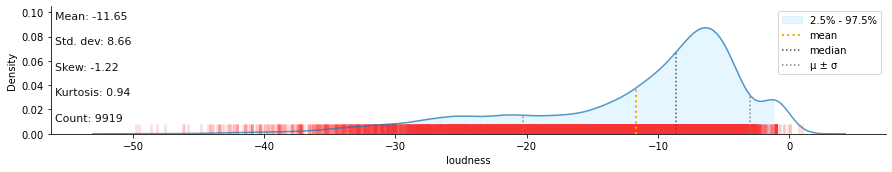

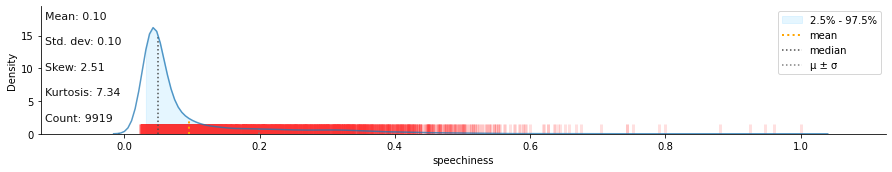

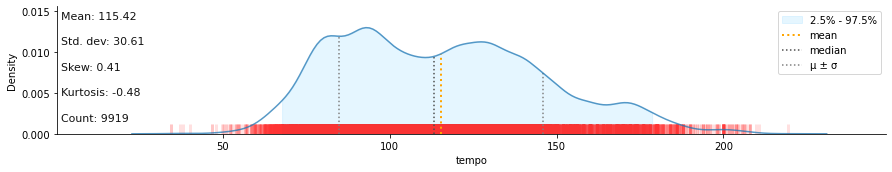

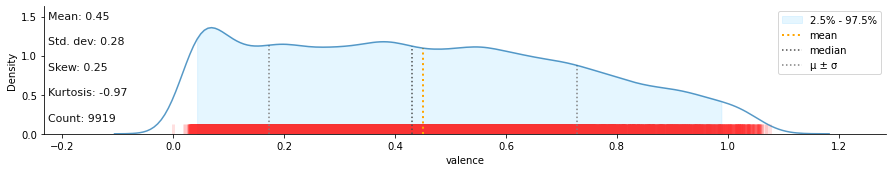

In [52]:
plot_dist = klib.describe.dist_plot(df1)
plot_dist.figure.savefig('dist_plot.pdf')

In [113]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [114]:
X = df1.iloc[ : , :-1]
X.shape
Y = df1["music_genre"]

In [127]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
target= lb.fit_transform(Y)
Y = pd.DataFrame(target)

C:\Users\sasha\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [128]:
y = Y.squeeze()

In [129]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [139]:
from sklearn.compose import make_column_transformer, make_column_selector

ohn = OneHotEncoder()
scale = MinMaxScaler()

ohn_ct = make_column_transformer(
    (ohn, categorical_columns),
    remainder = 'passthrough' 
)

df_ohn = ohn_ct.fit_transform(X)
df_ohn = pd.DataFrame(df_ohn)


In [202]:
ohn_ct.get_feature_names()

['onehotencoder__x0_Scale A',
 'onehotencoder__x0_Scale A Sharp',
 'onehotencoder__x0_Scale B',
 'onehotencoder__x0_Scale C',
 'onehotencoder__x0_Scale C Sharp',
 'onehotencoder__x0_Scale D',
 'onehotencoder__x0_Scale D Sharp',
 'onehotencoder__x0_Scale E',
 'onehotencoder__x0_Scale F',
 'onehotencoder__x0_Scale F Sharp',
 'onehotencoder__x0_Scale G',
 'onehotencoder__x0_Scale G Sharp',
 'onehotencoder__x1_Both',
 'onehotencoder__x1_Female',
 'onehotencoder__x1_Male',
 'onehotencoder__x2_Major',
 'onehotencoder__x2_Minor',
 'onehotencoder__x3_Band',
 'onehotencoder__x3_Duet',
 'onehotencoder__x3_Solo',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [203]:
ohn_list = []
for s in list(ohn_ct.get_feature_names())[:-11]:
    ohn_list.append(s.replace(s[:18], '', 1))
#pprint(ohn_list)

In [204]:
col_names = ohn_list + numerical_columns

In [205]:
len(col_names)

31

In [206]:
df_final.shape

(9919, 31)

In [207]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_columns),
        ("Scale", MinMaxScaler(), numerical_columns)]
)
df_final = preprocessing.fit_transform(X)
df_final = pd.DataFrame(x)
df_final

,Scale A,Scale A Sharp,Scale B,Scale C,Scale C Sharp,Scale D,Scale D Sharp,Scale E,Scale F,Scale F Sharp,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018311,0.902400,0.080142,0.887279,0.000000,0.022379,0.882529,0.098362,0.382038,0.590104
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.784686,0.215721,0.120262,0.532503,0.002553,0.109658,0.450206,0.015648,0.420772,0.069094
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000417,0.903174,0.059567,0.000000,0.000356,0.057374,0.837753,0.028831,0.381709,0.449637
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082993,0.315132,0.080780,0.818889,0.000000,0.067399,0.863266,0.047696,0.769256,0.515491
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.927117,0.606771,0.060785,0.500645,0.135681,0.087138,0.444469,0.043086,0.447650,0.548416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.963249,0.071337,0.055240,0.497832,0.949496,0.110721,0.404582,0.034693,0.209851,0.037778
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.792196,0.322454,0.000000,0.571707,0.026631,0.216570,0.659023,0.021906,0.482036,0.579883
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.807131,0.394829,0.110876,0.644538,0.000481,0.624106,0.486386,0.434696,0.514088,0.565495
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.103623,0.579299,0.044343,0.913452,0.000082,0.139350,0.837931,0.037324,0.441822,0.373919


In [194]:
df_final.columns = col_names

In [195]:
df_final.columns

Index(['Scale A', 'Scale A Sharp', 'Scale B', 'Scale C', 'Scale C Sharp',
       'Scale D', 'Scale D Sharp', 'Scale E', 'Scale F', 'Scale F Sharp',
       'Scale G', 'Scale G Sharp', 'Both', 'Female', 'Male', 'Major', 'Minor',
       'Band', 'Duet', 'Solo', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [196]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_final,y,test_size=0.2)

In [197]:
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

k_range = list(range(1,15))
scores = []
error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy_score(Y_test, y_pred)
    scores.append(metrics.accuracy_score(Y_test,y_pred))
    error.append(np.mean(y_pred != Y_test))

scores= np.mean(scores)
print(scores)

0.5842813940092165


In [198]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [199]:
print(k_scores)

[0.5576543496145429, 0.5183369279685918, 0.5597944546265973, 0.5836130690138206, 0.5911735557666102, 0.5882742891992593, 0.5929415445602422, 0.5959656439691126, 0.5936961003236759, 0.5958381111806391, 0.591425603755785, 0.5892837517192308, 0.5851229746427336, 0.5821004634379536]


Text(0, 0.5, 'Cross-Validated Accuracy')

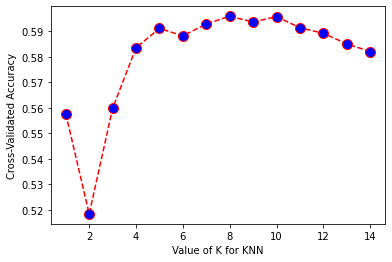

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Mean Error')

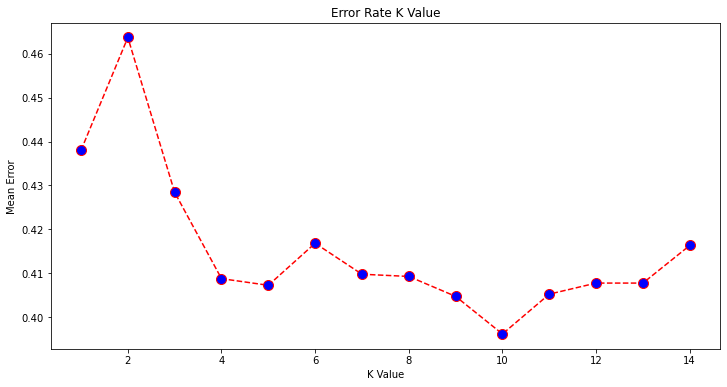

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [209]:
# Best Value of K
knn = KNeighborsClassifier(n_neighbors=7)
knn_base = knn.fit(X_train,Y_train)
y_pred_knn_base = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_knn_base))
#print(cross_val_score(knn,X_test,Y_test, cv=10, scoring="accuracy").mean())


0.5902217741935484


## GridSearch


In [210]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
algorithms = [ 'ball_tree', 'kd_tree', 'brute']

In [211]:
param_grid = dict(n_neighbors=k_range, weights = weight_options, algorithm = algorithms)
pprint(param_grid)


{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'weights': ['uniform', 'distance']}


In [212]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

In [213]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


In [214]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.610457688654823
{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10, weights='distance')


## Using the best parameters to make predictions
#### KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10, weights='distance')


In [215]:
y_pred_grid_knn = grid.predict(X_test)
accuracy_score(Y_test, y_pred_grid_knn)

0.608366935483871

In [216]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       503
           1       0.11      0.01      0.02        86
           2       0.25      0.03      0.05        79
           3       0.00      0.00      0.00        59
           4       0.59      0.46      0.52       364
           5       0.51      0.66      0.58       375
           6       0.52      0.70      0.60       518

    accuracy                           0.61      1984
   macro avg       0.40      0.39      0.37      1984
weighted avg       0.57      0.61      0.58      1984



In [217]:
print(metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted"))
f1_score_knn = metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted")

0.5774606064730735


In [218]:
print(metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr'))
roc_auc_score_knn = metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr')

0.8016630764841689


# Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv = 5, random_state = 0,solver='newton-cg',n_jobs = -1).fit(X_train,Y_train)


In [220]:
y_pred_log_test = logreg.predict(X_test)

In [221]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_log_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       503
           1       0.63      0.28      0.39        86
           2       0.51      0.30      0.38        79
           3       0.00      0.00      0.00        59
           4       0.66      0.67      0.66       364
           5       0.73      0.78      0.75       375
           6       0.75      0.89      0.81       518

    accuracy                           0.75      1984
   macro avg       0.59      0.54      0.55      1984
weighted avg       0.72      0.75      0.73      1984



C:\Users\sasha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [222]:
from sklearn.metrics import f1_score
f1_score_log = metrics.f1_score(Y_test,y_pred_log_test,average='weighted')
print(f1_score_log)


0.729199233954026


In [223]:
from sklearn.metrics import roc_auc_score
roc_auc_score_log = metrics.roc_auc_score(Y_test, y_score=logreg.predict_proba(X_test), multi_class='ovr')
pprint(roc_auc_score_log)

0.9320622109616912


In [224]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred_log_test)

0.613939533137197

## Classification: Full Trees

In [225]:
from sklearn.tree import  DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [226]:
clf_pred = clf.predict(X_test)

In [227]:
clf_f1 = metrics.f1_score(Y_test,clf_pred,average="weighted")
clf_f1

0.6662459314815807

In [228]:
roc_clf =  metrics.roc_auc_score(Y_test,y_score = clf.predict_proba(X_test), multi_class='ovr')
roc_clf

0.7225292636899381

## Hyperpapmeter optimization for Decision Tree Classifier

In [250]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)

C:\Users\sasha\AppData\Local\Temp/ipykernel_23084/2080369068.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
C:\Users\sasha\AppData\Local\Temp/ipykernel_23084/2080369068.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


In [251]:
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


In [252]:
tuned_tree_cv = RandomizedSearchCV(estimator             = clf,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 300,
                                   scoring = "accuracy"
                                   )



In [253]:
tuned_tree_cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [254]:
pprint(tuned_tree_cv.best_params_)

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'splitter': 'best'}


In [255]:
{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'splitter': 'best'}

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 25,
 'splitter': 'best'}

In [256]:
y_best_dtc = tuned_tree_cv.predict(X_test)
f1_score_dtc = metrics.f1_score(Y_test,y_best_dtc,average="weighted")
print(f1_score_dtc)


0.725162079678269


In [257]:
roc_auc_score_dtc = roc_auc_score(Y_test, y_score =tuned_tree_cv.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_dtc)


0.8834381400104592


## Random Forest Classifier

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [259]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [260]:
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [261]:
print(rf_classifier.score(X_test,Y_test))

0.7898185483870968


In [262]:
f1_score_rf = metrics.f1_score(Y_test,y_pred_rf,average="weighted")
print(f1_score_rf)

0.7692979191331508


In [263]:
roc_auc_score_rf = roc_auc_score(Y_test, y_score= rf_classifier.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf)


0.939906094941132


In [264]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [265]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [266]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [267]:
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [268]:
rf_rand = rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [269]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [270]:
### Best parameters 
{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}
 

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [271]:
y_best_rf = rf_rand.predict(X_test)
print(metrics.f1_score(Y_test,y_best_rf,average="weighted"))
f1_score_best_rf = metrics.f1_score(Y_test,y_best_rf,average="weighted")

0.7720026316498698


In [272]:
roc_auc_score_rf_best = roc_auc_score(Y_test,y_score=rf_rand.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf_best)

0.9434577085777096


In [277]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[0.00344861 0.00337853 0.00352737 0.00384855 0.00498389 0.00400787
 0.00212097 0.00394614 0.00367742 0.00355029 0.00398958 0.00340035
 0.00447411 0.00546738 0.00550511 0.00792272 0.00701679 0.00575636
 0.00451582 0.00546148 0.17781893 0.1108359  0.1113061  0.03760986
 0.06898867 0.08068219 0.03473779 0.09434416 0.09842979 0.04141666
 0.05383062]
 There are 31 features in total


In [278]:
og = df1.iloc[:,:-1]


In [281]:
feature_importances = list(zip(col_names, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

Feature: popularity                          Importance: 0.1778189331136785
Feature: danceability                        Importance: 0.11130609979345171
Feature: acousticness                        Importance: 0.11083589590899619
Feature: speechiness                         Importance: 0.09842979460049137
Feature: loudness                            Importance: 0.09434415829013984
Feature: instrumentalness                    Importance: 0.08068219169306072
Feature: energy                              Importance: 0.06898866603199943
Feature: valence                             Importance: 0.05383061547405817
Feature: tempo                               Importance: 0.04141666024104658
Feature: duration_ms                         Importance: 0.03760985666000762
Feature: liveness                            Importance: 0.0347377859387317
Feature: Major                               Importance: 0.007922720970342478
Feature: Minor                               Importance: 0.007016794991089228

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

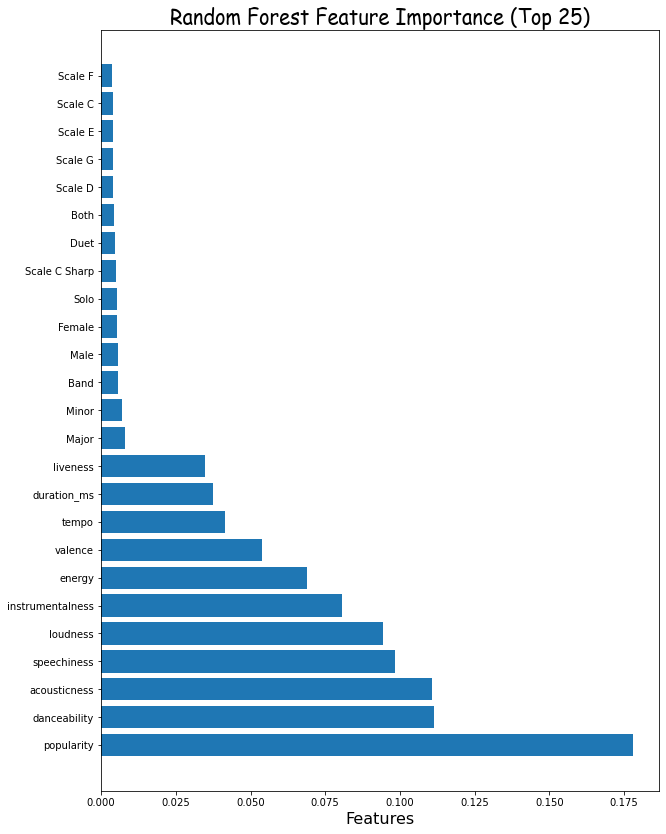

In [282]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

## Gradient Boosting Classifier 

In [283]:
from sklearn.ensemble import GradientBoostingClassifier # gbm

gb = GradientBoostingClassifier()
gb = gb.fit(X_test,Y_test)

In [284]:
y_pred_gb = gb.predict(X_test)

In [285]:
f1_score_gb = metrics.f1_score(Y_test,y_pred_gb, average='weighted')
print(f1_score_gb)

0.9702288165558632


In [286]:
roc_auc_score_gb = roc_auc_score(Y_test,y_score=gb.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_gb)

0.9990130246895047


In [287]:
print(classification_report(Y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       503
           1       1.00      0.90      0.94        86
           2       1.00      0.97      0.99        79
           3       1.00      0.97      0.98        59
           4       0.98      0.95      0.97       364
           5       0.98      0.96      0.97       375
           6       0.94      0.98      0.96       518

    accuracy                           0.97      1984
   macro avg       0.98      0.96      0.97      1984
weighted avg       0.97      0.97      0.97      1984



In [289]:
feature_importances = list(zip(col_names, gb.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

Feature: popularity                          Importance: 0.2558674892574286
Feature: acousticness                        Importance: 0.25220837769954385
Feature: speechiness                         Importance: 0.1640019428447879
Feature: danceability                        Importance: 0.09753454401193322
Feature: loudness                            Importance: 0.06372341208788007
Feature: valence                             Importance: 0.03867813525002912
Feature: instrumentalness                    Importance: 0.03639555807532388
Feature: energy                              Importance: 0.03175944026152489
Feature: tempo                               Importance: 0.017982591321996793
Feature: duration_ms                         Importance: 0.014674162011808203
Feature: liveness                            Importance: 0.013131919308755501
Feature: Scale B                             Importance: 0.0014174878434028142
Feature: Minor                               Importance: 0.00132003843372

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

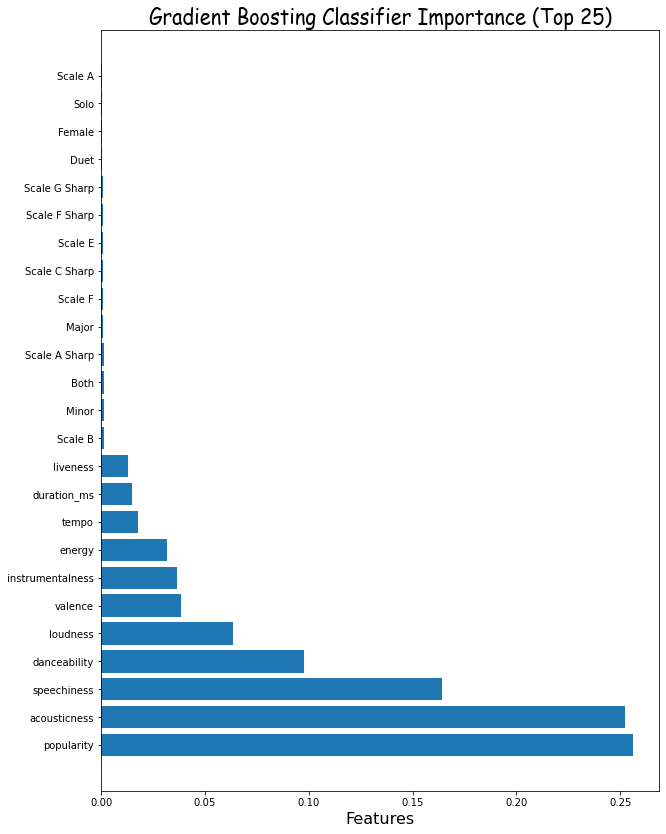

In [290]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boosting Classifier Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [291]:
model_performance = {
    
    'Model Name'        : ['Logistic Regression',
                           'Classification Trees', 
                           'Random Forest',
                           'Gradient Boosted Models'],
           
    'AUC Score'         : [roc_auc_score_log, 
                           roc_auc_score_dtc, 
                           roc_auc_score_rf_best,
                           roc_auc_score_gb
                            ],
    'F1 Score'          :   [f1_score_log,
                            f1_score_dtc,
                            f1_score_best_rf,
                            f1_score_gb
                            ]
}

In [292]:
model_performance = pd.DataFrame(model_performance)


In [293]:
model_performance


,Model Name,AUC Score,F1 Score
0,Logistic Regression,0.932062,0.729199
1,Classification Trees,0.883438,0.725162
2,Random Forest,0.943458,0.772003
3,Gradient Boosted Models,0.999013,0.970229
